In [2]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
from scipy import stats

#Loading Data
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/heart.csv')

***
# Describing the Data

The dataset contains information about patients with and without heart diseases, along with other variables.

The dataset comes from a CLeveland database, hosted on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
#Checking if dataset contains null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Variables:

1. Age 
2. Sex 
    - 1 = Male
    - 0 = Female
3. CP: Chest pain type
    - 0 = typical angina 
    - 1 = atypical angina
    - 2 = non-anginal pain 
    - 3 = asymptomatic
4. trestbps: Resting blood pressure 
5. chol: Serum cholestoral in mg/dl 
6. fbs: Fasting blood sugar > 120 mg/dl
    - 0 = False
    - 1 = True
7. restecg: Resting electrocardiographic results
    - 0 = normal
    - 1 = having ST-T wave abnormality
    - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: Maximum heart rate achieved 
9. exang: Exercise induced angina 
    - 0 = No
    - 1 = Yes
10. Oldpeak: ST depression induced by exercise relative to rest 
11. Slope: The slope of the peak exercise ST segment 
    - 1 = upward sloping
    - 2 = flat
    - 3 = downward sloping
12. Ca: Number of major vessels (0-3) colored by flourosopy 
13. Thal: A blood disorder called thalassemia
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect
14. Target:
    - 0 = No
    - 1 = Yes

### Outcome variable:
- Target

### Selected Categorical variable:
- Sex
- Chest pain type (CP)
- Fasting blood sugar (fbs)

### Selected Continuous Variable:
- Resting blood pressure (trestbps)
- Serum cholestoral in mg/dl (chol)
- Maximum heart rate achieved (thalach)


***
## Visualization of data

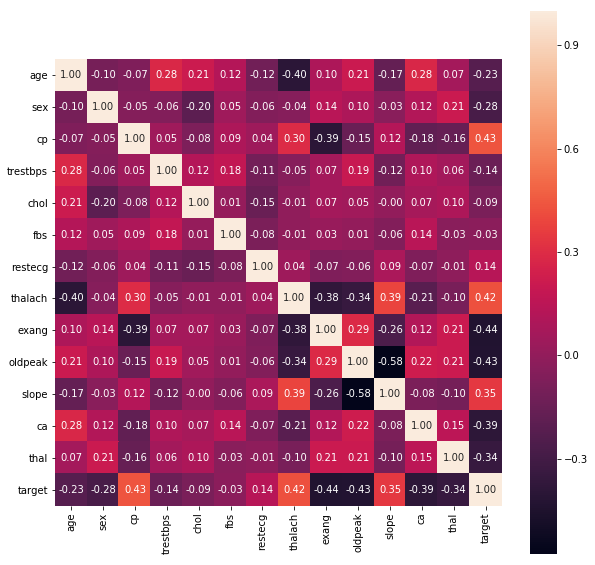

In [7]:
#Heatmap of correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square= True, annot=True,fmt='.2f')
plt.show()

Values with high correlation to Target include:
- Chest pain (cp)
- Maximum heart rate achieved (thalach)
- The slope of the peak exercise ST segment (Slope)

### Target

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

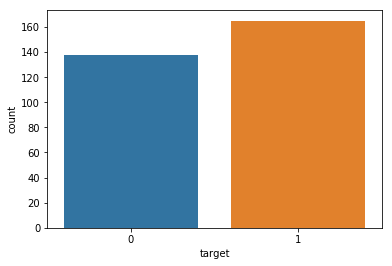

In [9]:
sns.countplot(x="target", data=df)
plt.show()

### Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

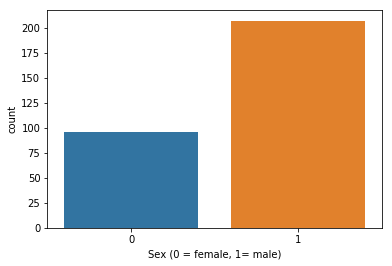

In [11]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

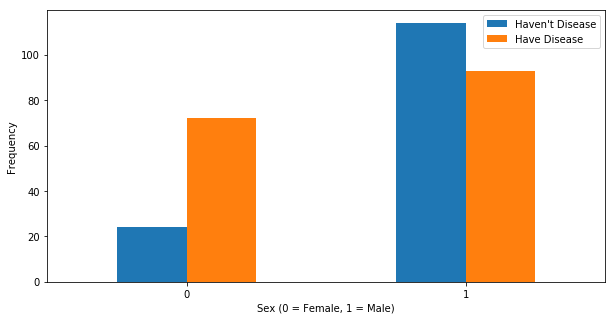

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Chest Pain (CP)

In [13]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

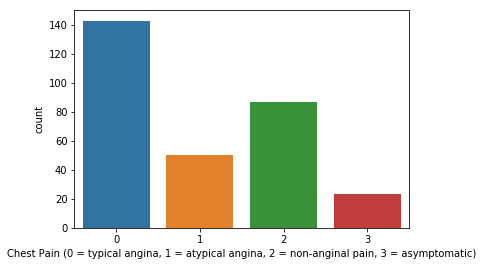

In [14]:
sns.countplot(x='cp', data=df)
plt.xlabel("Chest Pain (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)")
plt.show()

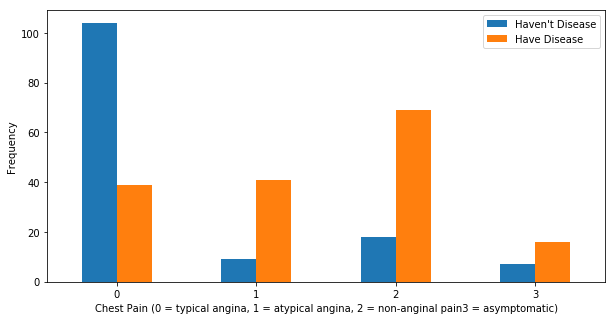

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Chest Pain (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain3 = asymptomatic)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Fasting blood sugar (fbs)

In [16]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

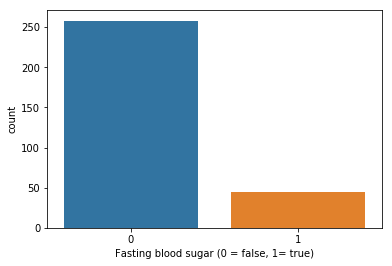

In [17]:
sns.countplot(x='fbs', data=df)
plt.xlabel("Fasting blood sugar (0 = false, 1= true)")
plt.show()

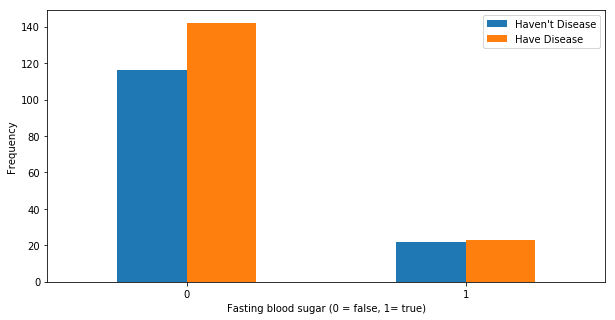

In [18]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Fasting blood sugar (0 = false, 1= true)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Resting blood pressure (trestbps)

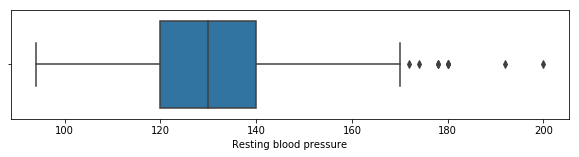

In [19]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x='trestbps', data=df)
ax.set(xlabel='Resting blood pressure')
plt.show()

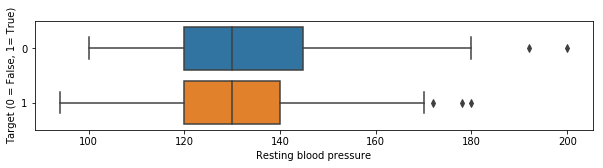

In [20]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x= 'trestbps', y='target', orient="h", data=df)
ax.set(ylabel='Target (0 = False, 1= True)', xlabel='Resting blood pressure')
plt.show()

### Serum cholestoral in mg/dl (chol)

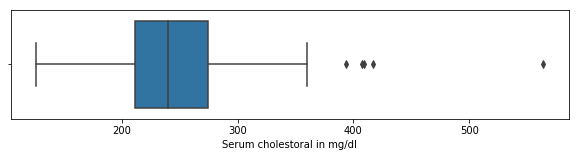

In [21]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x='chol', data=df)
ax.set(xlabel='Serum cholestoral in mg/dl')
plt.show()

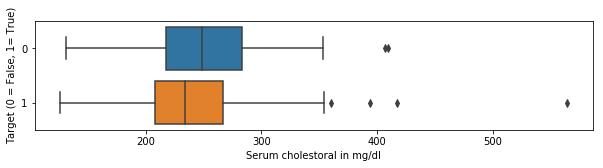

In [22]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x= 'chol', y='target', orient="h", data=df)
ax.set(ylabel='Target (0 = False, 1= True)', xlabel='Serum cholestoral in mg/dl')
plt.show()

### Maximum heart rate achieved (thalach)

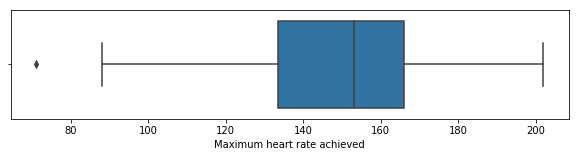

In [23]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x='thalach', data=df)
ax.set(xlabel='Maximum heart rate achieved')
plt.show()

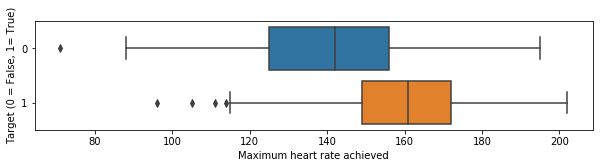

In [24]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x= 'thalach', y='target', orient="h", data=df)
ax.set(ylabel='Target (0 = False, 1= True)', xlabel='Maximum heart rate achieved')
plt.show()

*** 
# Creating Features

### Feature 1:

In [33]:
# Creating a data frame to hold our features.
features = pd.DataFrame()

#Has chest pain feature.
features['Has Chest Pain'] = np.where((df['cp'].isin([1, 2, 3])), 1, 0)

print(pd.crosstab(features['Has Chest Pain'], df['cp']))

cp                0   1   2   3
Has Chest Pain                 
0               143   0   0   0
1                 0  50  87  23


### Feature 2-5:

In [34]:
# Creating dummy variables for each Chest pain type
chest_pain = pd.get_dummies(df['cp'],prefix='cp')
features = pd.concat([features,chest_pain],axis=1)

### Feature 6-9:

In [35]:
# Creating dummy variables for each type of thalassemia - blood disorder
thalassemia_type = pd.get_dummies(df['thal'],prefix='thal')
features = pd.concat([features,thalassemia_type],axis=1)

### Feature 10:

In [37]:
# Combining Chest pain (cp) with Maximum heart rate achieved (thalach) - Two highly correlated values
means = df[['cp','thalach']].mean(axis=0)
stds = df[['cp','thalach']].std(axis=0)
features['cp_maxhr'] = ((df[['cp','thalach']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['cp', 'thalach']]
plotdf['cp_maxhr'] = features['cp_maxhr'] 

corrmat2 = plotdf.corr()

print(corrmat2)

                cp   thalach  cp_maxhr
cp        1.000000  0.295762  0.804911
thalach   0.295762  1.000000  0.804911
cp_maxhr  0.804911  0.804911  1.000000


In [38]:
print(features)

     Has Chest Pain  cp_0  cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  \
0                 1     0     0     0     1       0       1       0       0   
1                 1     0     0     1     0       0       0       1       0   
2                 1     0     1     0     0       0       0       1       0   
3                 1     0     1     0     0       0       0       1       0   
4                 0     1     0     0     0       0       0       1       0   
5                 0     1     0     0     0       0       1       0       0   
6                 1     0     1     0     0       0       0       1       0   
7                 1     0     1     0     0       0       0       0       1   
8                 1     0     0     1     0       0       0       0       1   
9                 1     0     0     1     0       0       0       1       0   
10                0     1     0     0     0       0       0       1       0   
11                1     0     0     1     0       0 

***
# Feature Selection

In combination with original features and newly created features I would select the following to be used in the model:
- Has Chest Pain 
- Chest pain (cp)
- Maximum heart rate achieved (thalach)
- The slope of the peak exercise ST segment (Slope)
- cp_maxhr

Since I do not know how to perform feature selection calculations I based my decision on correlation and intuition. 